In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_Drug = pd.read_csv(mouse_drug_data_to_load)
Clinical_Trial = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
Mouse_Drug.head()
Clinical_Trial.head()
new = Clinical_Trial.merge(Mouse_Drug,how = "left")
# Display the data table for preview
new.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_Volume = new.groupby(["Drug","Timepoint"])
# Convert to DataFrame
Mean_Tumor_Volume = pd.DataFrame(Tumor_Volume["Tumor Volume (mm3)"].mean())
# Preview DataFrame
Mean_Tumor_Volume.reset_index(inplace=True)
Mean_Tumor_Volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_Volume = new.groupby(["Drug","Timepoint"])
# Convert to DataFrame
Std_Tumor_Volume = pd.DataFrame(Tumor_Volume["Tumor Volume (mm3)"].sem())
# Preview DataFrame
Std_Tumor_Volume.reset_index(inplace=True)
Std_Tumor_Volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [76]:
# Minor Data Munging to Re-Format the Data Frames
Pivot_drug_df = Mean_Tumor_Volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
Pivot_drug_df
# Preview that Reformatting worked
Pivot_drug_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


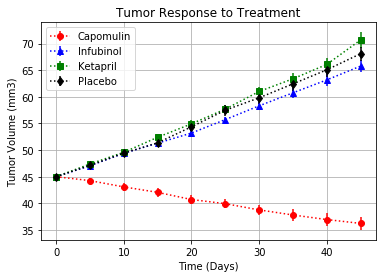

In [13]:
# Generate the Plot (with Error Bars)
Pivot_std_df = Std_Tumor_Volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plotStyleDict = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

fig1, ax1 = plt.subplots()
for drug in drugList:
    ax1.errorbar(Pivot_drug_df.index, Pivot_drug_df[drug], Pivot_std_df[drug], fmt = plotStyleDict[drug])
ax1.legend(drugList)
plt.grid(True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save the Figure
plt.savefig("TumorResponseToTreatment.png")
plt.show()


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [25]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_Metastatic_sites = new.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
del mean_Metastatic_sites["Tumor Volume (mm3)"]
# Preview DataFrame
mean_Metastatic_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [32]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_Metastatic_sites = new.groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
del std_Metastatic_sites["Tumor Volume (mm3)"]
del std_Metastatic_sites["Mouse ID"]
# Preview DataFrame
std_Metastatic_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [39]:
# Minor Data Munging to Re-Format the Data Frames
mean_Metastatic_sites= pd.DataFrame(mean_Metastatic_sites)
mean_Metastatic_sites.reset_index(inplace=True)
Pivot_meta_df = mean_Metastatic_sites.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
Pivot_meta_df.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


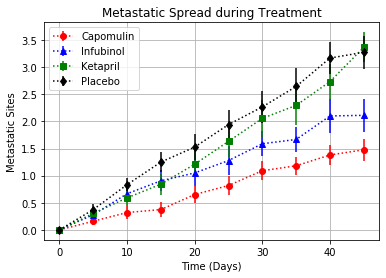

In [41]:
# Generate the Plot (with Error Bars)
std_Metastatic_sites= pd.DataFrame(std_Metastatic_sites)
std_Metastatic_sites.reset_index(inplace=True)
Pivot_meta_std_df = std_Metastatic_sites.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plotStyleDict = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

fig2, ax2 = plt.subplots()
for drug in drugList:
    ax2.errorbar(Pivot_meta_df.index, Pivot_meta_df[drug], Pivot_meta_std_df[drug], fmt = plotStyleDict[drug])
ax2.legend(drugList)
plt.grid(True)
plt.title('Metastatic Spread during Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')

# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")
plt.show()



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [52]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = new.groupby(["Drug","Timepoint"])
# Convert to DataFrame
mouse_count_df = mouse_count["Mouse ID"].count()
# Preview DataFrame
mouse_count_df = pd.DataFrame(mouse_count_df)
mouse_count_df.reset_index(inplace = True)
mouse_count_df = mouse_count_df.rename(columns = {"Mouse ID":"Mouse Count"})
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [66]:
# Minor Data Munging to Re-Format the Data Frames
Pivot_count_df = mouse_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
Pivot_count_df.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


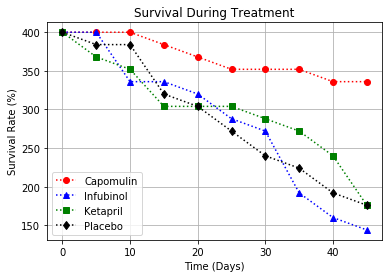

In [69]:
# Generate the Plot (Accounting for percentages)
Pivot_count_df = pd.DataFrame(Pivot_count_df)
for col in Pivot_count_df.columns:
    Pivot_count_df[col] = 100 * Pivot_count_df[col]/25
fig3, ax3 = plt.subplots()
for drug in drugList:
    plt.plot(Pivot_count_df.index, Pivot_count_df[drug], plotStyleDict[drug])
plt.grid(True)
ax3.legend(drugList)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [70]:
# Calculate the percent changes for each drug
percent_changes = (Pivot_drug_df.iloc[9, :] - Pivot_drug_df.iloc[0,:])/Pivot_drug_df.iloc[0,:] * 100
# Display the data to confirm
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

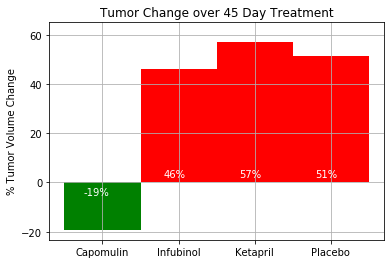

In [108]:
# Store all Relevant Percent Changes into a Tuple
percentChange = pd.DataFrame(percent_changes)
percentChange = percentChange.rename(columns = {0 : "Percent Change"})

# Splice the data between passing and failing drugs
percentChange["Pass"] = (percentChange < 0)
percentChange

# Orient widths. Add labels, tick marks, etc. 

# Use functions to label the percentages of changes
fig4, ax4 = plt.subplots()
x = 0
for drug in drugList:
    y = percentChange.loc[drug, "Percent Change"]
    if percentChange.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = 1, color = "g")
        plt.text(x-.25, -5, '{:.0f}%'.format(y), color = "white")
    else:
        ax4.bar(drug, y, width = 1, color = "r")
        plt.text(x-.2, 2, '{:.0f}%'.format(y), color = "white")
    x = 1 + x

# Call functions to implement the function calls
plt.yticks((-20, 0, 20, 40, 60))
plt.xticks(drugList)
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.ylim(ymax = 65)
ax4.grid()
# Save the Figure
plt.savefig("MeanTumorChange.png")

plt.show()


![Metastatic Spread During Treatment](../Images/change.png)